In [ ]:
pip install pandas matplotlib


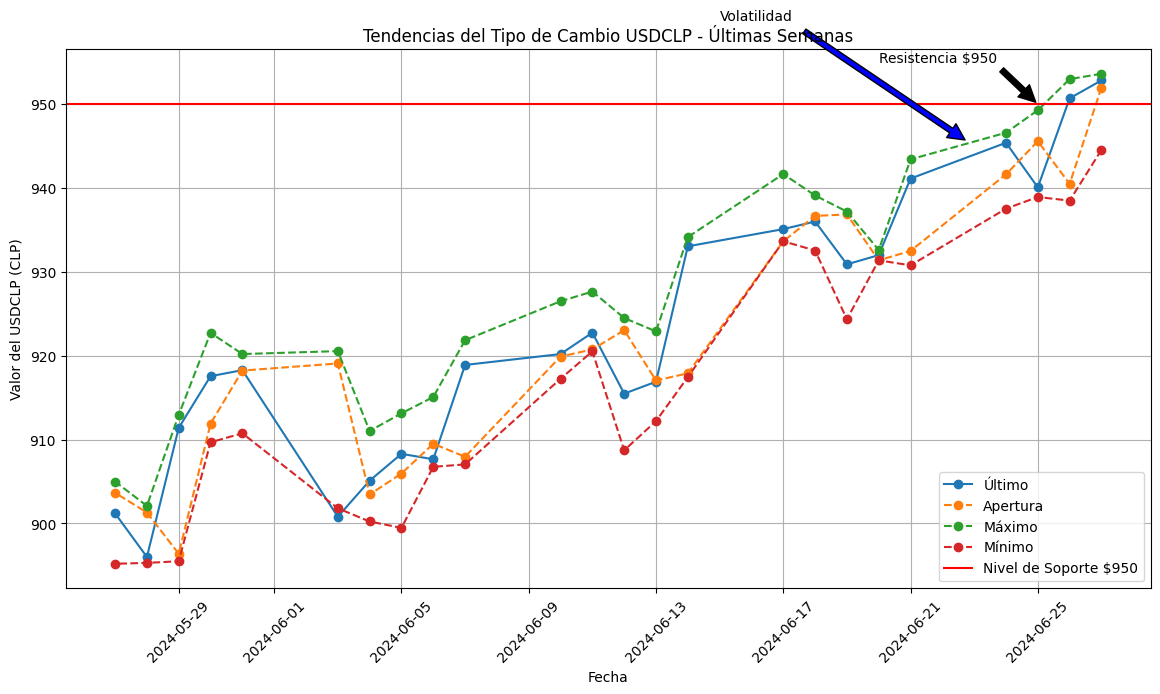

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos proporcionados
data = {
    "Fecha": [
        "2024-06-27", "2024-06-26", "2024-06-25", "2024-06-24", "2024-06-21", "2024-06-20", "2024-06-19",
        "2024-06-18", "2024-06-17", "2024-06-14", "2024-06-13", "2024-06-12", "2024-06-11", "2024-06-10",
        "2024-06-07", "2024-06-06", "2024-06-05", "2024-06-04", "2024-06-03", "2024-05-31", "2024-05-30",
        "2024-05-29", "2024-05-28", "2024-05-27"
    ],
    "Último": [
        952.84, 950.70, 940.08, 945.40, 941.13, 932.00, 930.90, 936.01, 935.10, 933.05, 916.90, 915.48,
        922.75, 920.20, 918.90, 907.65, 908.30, 905.10, 900.80, 918.28, 917.56, 911.40, 896.00, 901.20
    ],
    "Apertura": [
        951.99, 940.50, 945.58, 941.63, 932.50, 931.38, 936.85, 936.68, 933.65, 917.90, 917.05, 923.05,
        920.75, 919.90, 907.95, 909.50, 905.95, 903.45, 919.08, 918.23, 911.90, 896.38, 901.30, 903.65
    ],
    "Máximo": [
        953.63, 952.99, 949.28, 946.60, 943.42, 932.61, 937.19, 939.11, 941.67, 934.15, 922.90, 924.50,
        927.65, 926.50, 921.85, 915.08, 913.13, 911.02, 920.55, 920.20, 922.73, 912.95, 902.09, 904.99
    ],
    "Mínimo": [
        944.55, 938.50, 938.93, 937.54, 930.78, 931.38, 924.35, 932.55, 933.65, 917.45, 912.20, 908.72,
        920.52, 917.25, 907.04, 906.75, 899.47, 900.23, 901.80, 910.75, 909.68, 895.49, 895.29, 895.19
    ]
}

df = pd.DataFrame(data)

# Convertir la columna de fechas a un formato de fecha
df["Fecha"] = pd.to_datetime(df["Fecha"])
df.set_index("Fecha", inplace=True)

# Crear la gráfica
plt.figure(figsize=(14, 7))
plt.plot(df.index, df["Último"], marker='o', label="Último")
plt.plot(df.index, df["Apertura"], marker='o', linestyle='--', label="Apertura")
plt.plot(df.index, df["Máximo"], marker='o', linestyle='--', label="Máximo")
plt.plot(df.index, df["Mínimo"], marker='o', linestyle='--', label="Mínimo")

# Añadir análisis y tendencias
plt.axhline(y=950, color='r', linestyle='-', label="Nivel de Soporte $950")
plt.annotate('Resistencia $950', xy=(pd.Timestamp('2024-06-25'), 950), xytext=(pd.Timestamp('2024-06-20'), 955),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Volatilidad', xy=(pd.Timestamp('2024-06-23'), 945), xytext=(pd.Timestamp('2024-06-15'), 960),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Personalizar la gráfica
plt.title("Tendencias del Tipo de Cambio USDCLP - Últimas Semanas")
plt.xlabel("Fecha")
plt.ylabel("Valor del USDCLP (CLP)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Guardar la gráfica
plt.savefig('tendencias_usdclp_analisis_final_2.png')
plt.show()


In [ ]:
pip install pandas matplotlib scikit-learn


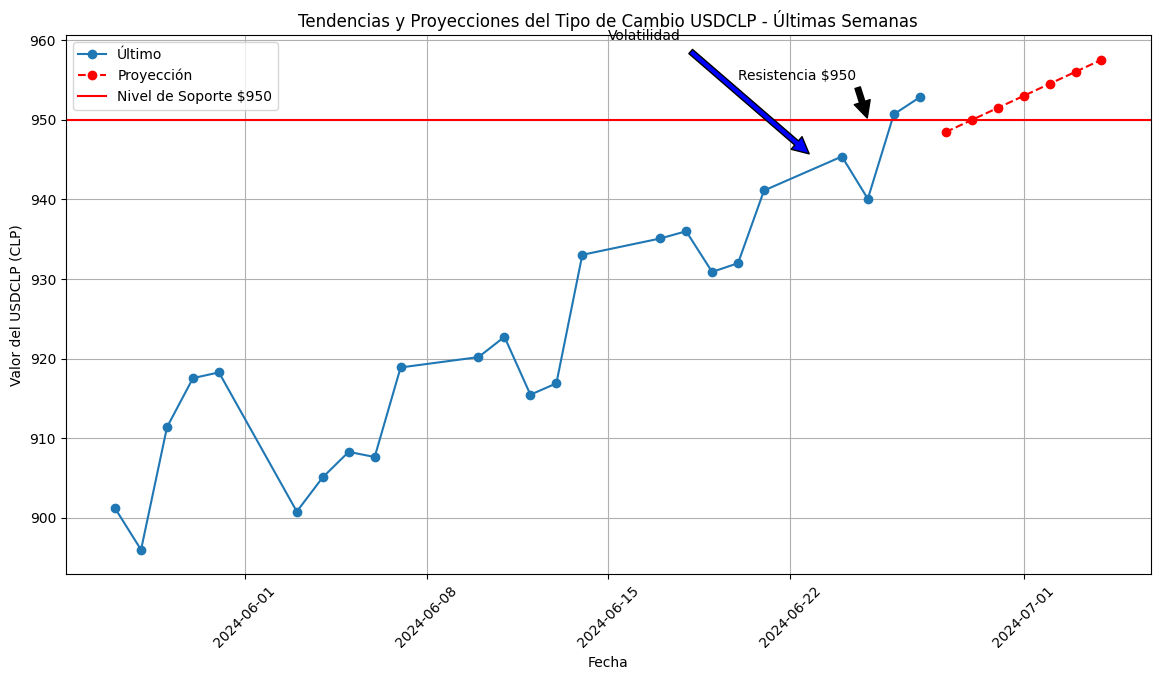

       Fecha  Proyección
0 2024-06-28  948.470093
1 2024-06-29  949.983974
2 2024-06-30  951.497854
3 2024-07-01  953.011735
4 2024-07-02  954.525616
5 2024-07-03  956.039496
6 2024-07-04  957.553377


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Crear un DataFrame con los datos proporcionados
data = {
    "Fecha": [
        "2024-06-27", "2024-06-26", "2024-06-25", "2024-06-24", "2024-06-21", "2024-06-20", "2024-06-19",
        "2024-06-18", "2024-06-17", "2024-06-14", "2024-06-13", "2024-06-12", "2024-06-11", "2024-06-10",
        "2024-06-07", "2024-06-06", "2024-06-05", "2024-06-04", "2024-06-03", "2024-05-31", "2024-05-30",
        "2024-05-29", "2024-05-28", "2024-05-27"
    ],
    "Último": [
        952.84, 950.70, 940.08, 945.40, 941.13, 932.00, 930.90, 936.01, 935.10, 933.05, 916.90, 915.48,
        922.75, 920.20, 918.90, 907.65, 908.30, 905.10, 900.80, 918.28, 917.56, 911.40, 896.00, 901.20
    ]
}

df = pd.DataFrame(data)

# Convertir la columna de fechas a un formato de número de días para la regresión
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["Días"] = (df["Fecha"] - df["Fecha"].min()).dt.days

# Preparar los datos para la regresión
X = df["Días"].values.reshape(-1, 1)
y = df["Último"].values

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Proyectar los próximos 7 días
proximos_dias = np.array([df["Días"].max() + i for i in range(1, 8)]).reshape(-1, 1)
proyecciones = model.predict(proximos_dias)

# Crear un DataFrame con las proyecciones
proyecciones_df = pd.DataFrame({
    "Fecha": [df["Fecha"].max() + pd.Timedelta(days=i) for i in range(1, 8)],
    "Proyección": proyecciones
})

# Graficar los datos históricos y las proyecciones
plt.figure(figsize=(14, 7))
plt.plot(df["Fecha"], df["Último"], marker='o', label="Último")
plt.plot(proyecciones_df["Fecha"], proyecciones_df["Proyección"], marker='o', linestyle='--', color='red', label="Proyección")

# Añadir análisis y tendencias
plt.axhline(y=950, color='r', linestyle='-', label="Nivel de Soporte $950")
plt.annotate('Resistencia $950', xy=(pd.Timestamp('2024-06-25'), 950), xytext=(pd.Timestamp('2024-06-20'), 955),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Volatilidad', xy=(pd.Timestamp('2024-06-23'), 945), xytext=(pd.Timestamp('2024-06-15'), 960),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Personalizar la gráfica
plt.title("Tendencias y Proyecciones del Tipo de Cambio USDCLP - Últimas Semanas")
plt.xlabel("Fecha")
plt.ylabel("Valor del USDCLP (CLP)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Guardar la gráfica
plt.savefig('tendencias_usdclp_analisis_proyeccion.png')
plt.show()

# Mostrar las proyecciones
print(proyecciones_df)
